In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Read .csv from file

In [3]:
data = pd.read_csv('./netflix_revenue_updated.csv')

In [4]:
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['Year'] = data['Date'].dt.year

## Count % for USA & Canada and Europe, Middle East and Africa from global earnings 

In [5]:
r_ucan = []
r_emea = []

for i,r in data["Global Revenue"].items():
    u = list(data["UCAN Streaming Revenue"].items())[i][1] * 100 / r
    e = list(data["EMEA Streaming Revenue"].items())[i][1] * 100 / r
    r_ucan.append(round(u, 2))
    r_emea.append(round(e, 2))

data["UCAN%"] = r_ucan
data["EMEA%"] = r_emea
data.loc[:,["Date", "Global Revenue", "UCAN Streaming Revenue", "UCAN%", "EMEA Streaming Revenue", "EMEA%"]]

,Date,Global Revenue,UCAN Streaming Revenue,UCAN%,EMEA Streaming Revenue,EMEA%
0,2019-03-31,4520992000,2256851000,49.92,1233379000,27.28
1,2019-06-30,4923116000,2501199000,50.81,1319087000,26.79
2,2019-09-30,5244905000,2621250000,49.98,1428040000,27.23
3,2019-12-31,5467434000,2671908000,48.87,1562561000,28.58
4,2020-03-31,5767691000,2702776000,46.86,1723474000,29.88
5,2020-06-30,6148286000,2839670000,46.19,1892537000,30.78
6,2020-09-30,6435637000,2933445000,45.58,2019083000,31.37
7,2020-12-31,6644442000,2979505000,44.84,2137158000,32.16
8,2021-03-31,7163282000,3170972000,44.27,2343674000,32.72
9,2021-06-30,7341777000,3234643000,44.06,2400480000,32.70


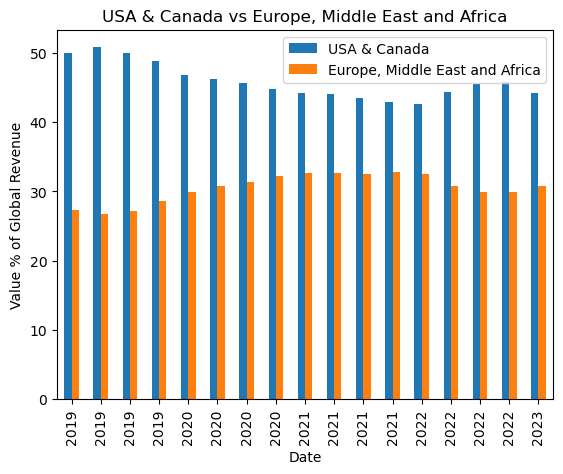

In [14]:
data.plot(x='Year', y=['UCAN%', 'EMEA%'], kind='bar', legend=True)
plt.title('USA & Canada vs Europe, Middle East and Africa')
plt.xlabel('Date')
plt.ylabel('Value % of Global Revenue')
plt.legend(['USA & Canada', 'Europe, Middle East and Africa'])

## Predict % for USA & Canada and Europe, Middle East and Africa from global earnings

In [54]:
x_ucan = np.arange(len(r_ucan)).reshape(-1, 1)
y_ucan = r_ucan

x_emea = np.arange(len(r_emea)).reshape(-1, 1)
y_emea = r_emea

# Create a linear regression model
model_ucan = LinearRegression()
model_emea = LinearRegression()

# Train the model
model_ucan.fit(x_ucan, y_ucan)
model_emea.fit(x_emea, y_emea)

future_ucan = np.arange(len(r_ucan), len(r_ucan) + 15).reshape(-1, 1)
predicted_values_ucan = model_ucan.predict(future_ucan)

future_emea = np.arange(len(r_emea), len(r_emea) + 15).reshape(-1, 1)
predicted_values_emea = model_emea.predict(future_emea)

predicted_values_ucan = [round(x,2) for x in predicted_values_ucan]
predicted_values_emea = [round(x,2) for x in predicted_values_emea]

# predicted_values_ucan = predicted_values_ucan[3:] # skip rest of 2023

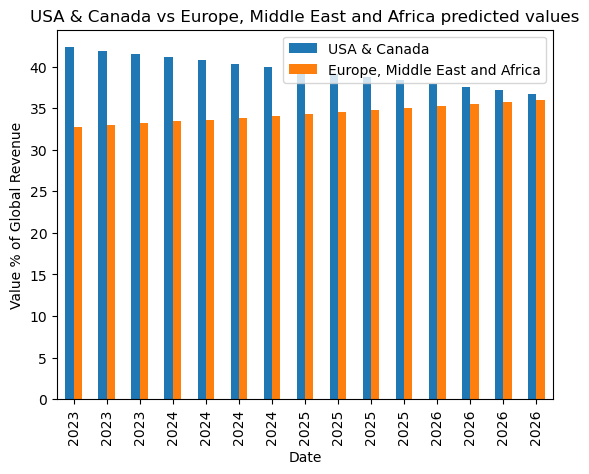

In [55]:
predicted = pd.DataFrame({'Year':[2023, 2023, 2023, 2024, 2024, 2024, 2024, 2025, 2025, 2025, 2025, 2026, 2026, 2026, 2026]})
predicted['UCAN%'] = predicted_values_ucan
predicted['EMEA%'] = predicted_values_emea

predicted.plot(x='Year', y=['UCAN%', 'EMEA%'], kind='bar', legend=True)
plt.title('USA & Canada vs Europe, Middle East and Africa predicted values')
plt.xlabel('Date')
plt.ylabel('Value % of Global Revenue')
plt.legend(['USA & Canada', 'Europe, Middle East and Africa'])